In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import os
os.chdir('/Users/39388/Documents')

## The Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [3]:
data = pd.read_csv('all_matches_combined_bbb.csv', header=0, index_col=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(197, 13)
['team', 'match_id', 'runrate_first_six_over', 'wickets_lost_first_six', 'runrate_last_five_over', 'wickets_lost_last_five', 'batsman_PCA', 'bowler_PCA', 'toss_win', 'match_win', 'strike_rotation', 'stddev_batsman', 'stddev_bowler']


In [4]:


data.head()

,team,match_id,runrate_first_six_over,wickets_lost_first_six,runrate_last_five_over,wickets_lost_last_five,batsman_PCA,bowler_PCA,toss_win,match_win,strike_rotation,stddev_batsman,stddev_bowler
0,Islamabad United,1211642.0,9.0,2.0,9.0,6.0,0.112789,-0.191240,0.0,0.0,79.0,1.613872,1.494731
1,Quetta Gladiators,1211642.0,6.0,3.0,9.0,3.0,-0.401480,0.044789,1.0,1.0,67.0,1.712828,0.530870
2,Karachi Kings,1211643.0,8.0,1.0,11.0,2.0,2.358933,0.275947,0.0,1.0,88.0,2.246046,0.419501
3,Peshawar Zalmi,1211643.0,8.0,2.0,13.0,2.0,0.865969,0.232708,1.0,0.0,105.0,1.376433,0.759959
4,Lahore Qalandars,1211644.0,10.0,2.0,7.0,3.0,-0.328489,-0.058016,0.0,0.0,54.0,1.109202,1.860303


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [5]:
data['education'].unique()

KeyError: 'education'

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [ ]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns.

In [6]:
data['education'].unique()

KeyError: 'education'

### Data exploration

In [7]:
data['match_win'].value_counts()

0.0    100
1.0     97
Name: match_win, dtype: int64

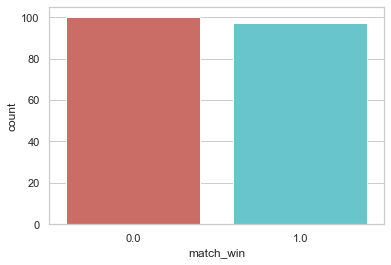

In [8]:
sns.countplot(x='match_win',data=data, palette='hls')
plt.show()

In [9]:
count_no_sub = len(data[data['match_win']==0])
count_sub = len(data[data['match_win']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no win is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of win is", pct_of_sub*100)

percentage of no win is 50.76142131979695
percentage of win is 49.23857868020304


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, Let's do some more exploration.

In [10]:
data.groupby('match_win').mean()

,match_id,runrate_first_six_over,wickets_lost_first_six,runrate_last_five_over,wickets_lost_last_five,batsman_PCA,bowler_PCA,toss_win,strike_rotation,stddev_batsman,stddev_bowler
match_win,,,,,,,,,,,
0.0,1.252354e+06,7.47000,1.780000,9.740000,3.310000,0.187027,0.346785,0.360000,72.260000,1.517963,1.077548
1.0,1.251935e+06,8.56701,1.216495,11.041237,1.865979,0.546018,-0.100880,0.639175,71.690722,1.578544,1.177820


Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [11]:
data.groupby('batsman_PCA').mean()

,match_id,runrate_first_six_over,wickets_lost_first_six,runrate_last_five_over,wickets_lost_last_five,bowler_PCA,toss_win,match_win,strike_rotation,stddev_batsman,stddev_bowler
batsman_PCA,,,,,,,,,,,
-1.221873,1293024.5,10.5,2.0,7.5,3.0,0.585933,0.0,0.0,61.0,1.056042,0.740876
-1.214391,1293009.0,9.0,1.0,14.0,3.0,0.523751,1.0,0.0,80.0,1.131589,1.099300
-1.201653,1293028.0,6.0,2.0,7.0,1.0,1.074225,1.0,0.0,64.0,1.362790,1.114771
-1.023997,1247030.0,7.0,0.0,6.0,3.0,0.439696,1.0,0.0,73.0,1.397190,0.888107
-0.991881,1247024.0,9.0,0.0,10.0,4.0,0.282835,0.0,1.0,69.0,1.528522,2.507877
...,...,...,...,...,...,...,...,...,...,...,...
2.614984,1247016.0,5.0,0.0,13.0,3.0,0.849902,0.0,0.0,73.0,1.955616,0.644663
2.795073,1211671.0,6.0,2.0,9.0,2.0,0.449906,1.0,0.0,83.0,2.086672,1.301850
2.872079,1247031.0,11.0,1.0,12.0,1.0,0.439696,1.0,1.0,74.0,2.003350,0.888107


In [12]:
data.groupby('marital').mean()

KeyError: 'marital'

In [ ]:
data.groupby('education').mean()

Visualizations

In [ ]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

In [ ]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

In [13]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

AttributeError: 'DataFrame' object has no attribute 'education'

Education seems a good predictor of the outcome variable.

In [ ]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

Day of week may not be a good predictor of the outcome.

In [ ]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

Month might be a good predictor of the outcome variable.

In [ ]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Most customers of the bank in this dataset are in the age range of 30-40.

In [ ]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

In [ ]:
cat_vars=['runrate_first_six_over', 'wickets_lost_first_six', 'runrate_last_five_over', 'wickets_lost_last_five', 'batsman_PCA', 'bowler_PCA', 'toss_win', 'match_win', 'strike_rotation', 'stddev_batsman', 'stddev_bowler']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['runrate_first_six_over', 'wickets_lost_first_six', 'runrate_last_five_over', 'wickets_lost_last_five', 'batsman_PCA', 'bowler_PCA', 'toss_win', 'match_win', 'strike_rotation', 'stddev_batsman', 'stddev_bowler']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

### Over-sampling using SMOTE

In [78]:
X = data_final.loc[:, data_final.columns != 'match_win']
y = data_final.loc[:, data_final.columns == 'match_win']

In [80]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['match-win'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no win in oversampled data",len(os_data_y[os_data_y['match_win']==0]))
print("Number of win",len(os_data_y[os_data_y['match_win']==1]))
print("Proportion of no win data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of win data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


### Recursive feature elimination

In [82]:
data_final_vars=data_final.columns.values.tolist()
y=['match_win']
X=[i for i in data_final_vars if i not in y]

In [92]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False  True False False  True
 False  True False False False False False False False False False False
 False  True False False False False  True False False False  True  True
 False False False False False False False  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
  True False  True]
[39 38 26 42  9 12 24 36  1 35  8  1  7  1  5 32  2  4 31  3  6 10 23 21
 17  1 14 18 15 22  1 20 16 19  1  1 41 28 44 37 33 43 34  1  1  1  1  1
  1  1  1  1  1  1 29 30 11 27 40 25  1 13  1]


The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [99]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

### Implementing the model

In [100]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.545891
         Iterations: 35
                                Results: Logit
Model:                   Logit                No. Iterations:       35.0000   
Dependent Variable:      y                    Pseudo R-squared:     0.212     
Date:                    2018-09-10 12:16     AIC:                  55867.1778
No. Observations:        51134                BIC:                  56044.0219
Df Model:                19                   Log-Likelihood:       -27914.   
Df Residuals:            51114                LL-Null:              -35443.   
Converged:               0.0000               Scale:                1.0000    
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
euribor3m             -0.4634    0.0091 -50.9471 0.0000     -0.4813    -0.4456
job_blue-collar   

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The p-values for four variables are very high, therefore, we will remove them.

In [117]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [118]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.555865
         Iterations 7
                           Results: Logit
Model:                Logit             No. Iterations:    7.0000    
Dependent Variable:   y                 Pseudo R-squared:  0.198     
Date:                 2018-09-10 12:38  AIC:               56879.2425
No. Observations:     51134             BIC:               57020.7178
Df Model:             15                Log-Likelihood:    -28424.   
Df Residuals:         51118             LL-Null:           -35443.   
Converged:            1.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.4488   0.0074 -60.6837 0.0000 -0.4633 -0.4343
job_blue-collar      -0.2060   0.0278  -7.4032 0.0000 -0.2605 -0.1515
job_housemaid   

### Logistic Regression Model Fitting

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


### Confusion Matrix

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6124 1542]
 [2505 5170]]


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.71      0.80      0.75      7666
          1       0.77      0.67      0.72      7675

avg / total       0.74      0.74      0.74     15341



#### Interpretation:

Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer's preferred term deposit were promoted.

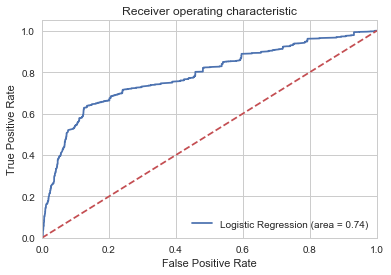

In [124]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()